This notebook shows how to use the global_biases diagnostic.

The `GlobalBiases` class provides an easy interface to plot 2D biases maps for a given experiment and a variables with respect to some observational data.

Let's plot the global mean temperature for the historical experiment, with a comparison done with the same ERA5 time span and 1990-1999 climatology.

In [ ]:
from aqua.diagnostics import GlobalBiases, PlotGlobalBiases

/LUMI_TYKKY_A4O6710/miniconda/envs/env1/lib/python3.12/site-packages/esmpy/interface/loadESMF.py:94: VersionWarning: ESMF installation version 8.8.0, ESMPy version 8.8.0b0
  warnings.warn("ESMF installation version {}, ESMPy version {}".format(


As a first step, we initialize the GlobalBias class for both the dataset and the reference data.


In [ ]:
biases_ifs_nemo = GlobalBiases(model='IFS-NEMO', exp='historical-1990', source='lra-r100-monthly', startdate="1990-01-01", enddate="1999-12-31", loglevel="DEBUG")

biases_era5 = GlobalBiases(model='ERA5', exp='era5', source='monthly', startdate="1990-01-01", enddate="1999-12-31", loglevel="DEBUG")


Now we retrieve the data for the target variable (e.g., 'q') and compute its climatology.
The climatology will be stored as a class attribute and can optionally be saved as a NetCDF file.

In [4]:
var = 'q'

biases_ifs_nemo.retrieve(var=var)
biases_ifs_nemo.compute_climatology(seasonal=True, save_netcdf=False)

biases_era5.retrieve(var=var)
biases_era5.compute_climatology(seasonal=True, save_netcdf=False)

2025-06-04 17:15:32 :: ConfigPath :: DEBUG    -> AQUA installation found in /users/caprioli/.aqua
2025-06-04 17:15:32 :: ConfigPath :: DEBUG    -> Configuration file found in /users/caprioli/.aqua/config-aqua.yaml
2025-06-04 17:15:32 :: ConfigPath :: DEBUG    -> Catalog found in /users/caprioli/.aqua/config-aqua.yaml file are ['ci', 'obs', 'climatedt-phase1', 'climatedt-e25.1']
2025-06-04 17:15:32 :: ConfigPath :: DEBUG    -> Available catalogs are ['ci', 'obs', 'climatedt-phase1', 'climatedt-e25.1']
2025-06-04 17:15:32 :: ConfigPath :: DEBUG    -> Default catalog will be ci
2025-06-04 17:15:32 :: ConfigPath :: DEBUG    -> Catalog file is /users/caprioli/.aqua/catalogs/ci/catalog.yaml
2025-06-04 17:15:32 :: ConfigPath :: DEBUG    -> Machine file is /users/caprioli/.aqua/catalogs/ci/machine.yaml
2025-06-04 17:15:32 :: ConfigPath :: DEBUG    -> Machine found in configuration file, set to lumi
2025-06-04 17:15:32 :: ConfigPath :: DEBUG    -> Machine found in configuration file, set to lum

Now we initialize the plotting class.  
The generated figures can optionally be saved as PNG or PDF files (enabled by default).

In [5]:
plot_biases = PlotGlobalBiases(save_pdf=False, save_png=False, loglevel='DEBUG')

Let's plot the climatology of variable 'q' at 180 hPa for the IFS-NEMO data:

2025-06-04 17:20:14 :: Global Biases :: INFO     -> Plotting climatology.
2025-06-04 17:20:14 :: Pressure levels :: INFO     -> Selecting pressure level 18000 for variable 'q'.
2025-06-04 17:20:14 :: ConfigPath :: DEBUG    -> Updating the log_level to DEBUG
2025-06-04 17:20:14 :: ConfigPath :: DEBUG    -> AQUA installation found in /users/caprioli/.aqua
2025-06-04 17:20:14 :: ConfigPath :: DEBUG    -> Configuration file found in /users/caprioli/.aqua/config-aqua.yaml
2025-06-04 17:20:14 :: ConfigPath :: DEBUG    -> Catalog found in /users/caprioli/.aqua/config-aqua.yaml file are ['ci', 'obs', 'climatedt-phase1', 'climatedt-e25.1']
2025-06-04 17:20:14 :: ConfigPath :: DEBUG    -> Available catalogs are ['ci', 'obs', 'climatedt-phase1', 'climatedt-e25.1']
2025-06-04 17:20:14 :: ConfigPath :: DEBUG    -> Default catalog will be ci
2025-06-04 17:20:14 :: ConfigPath :: DEBUG    -> Catalog file is /users/caprioli/.aqua/catalogs/ci/catalog.yaml
2025-06-04 17:20:14 :: ConfigPath :: DEBUG    ->

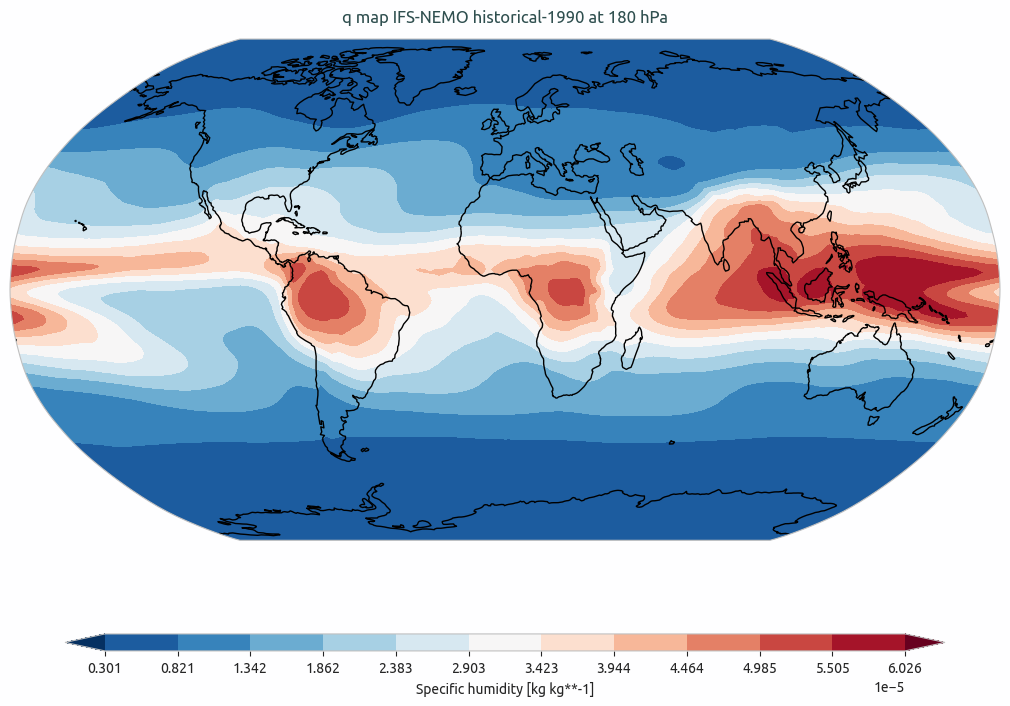

In [6]:
plot_biases.plot_climatology(data=biases_ifs_nemo.climatology, var=var, plev=18000)

Now we plot the total bias map for variable 'q' between IFS-NEMO data and the reference dataset ERA5:


2025-06-04 17:21:52 :: Global Biases :: INFO     -> Plotting global biases.
2025-06-04 17:21:52 :: Pressure levels :: INFO     -> Selecting pressure level 18000 for variable 'q'.
2025-06-04 17:21:52 :: Pressure levels :: INFO     -> Selecting pressure level 18000 for variable 'q'.
2025-06-04 17:22:04 :: ConfigPath :: DEBUG    -> AQUA installation found in /users/caprioli/.aqua
2025-06-04 17:22:04 :: ConfigPath :: DEBUG    -> Configuration file found in /users/caprioli/.aqua/config-aqua.yaml
2025-06-04 17:22:04 :: ConfigPath :: DEBUG    -> Catalog found in /users/caprioli/.aqua/config-aqua.yaml file are ['ci', 'obs', 'climatedt-phase1', 'climatedt-e25.1']
2025-06-04 17:22:04 :: ConfigPath :: DEBUG    -> Available catalogs are ['ci', 'obs', 'climatedt-phase1', 'climatedt-e25.1']
2025-06-04 17:22:04 :: ConfigPath :: DEBUG    -> Default catalog will be ci
2025-06-04 17:22:04 :: ConfigPath :: DEBUG    -> Catalog file is /users/caprioli/.aqua/catalogs/ci/catalog.yaml
2025-06-04 17:22:04 :: C

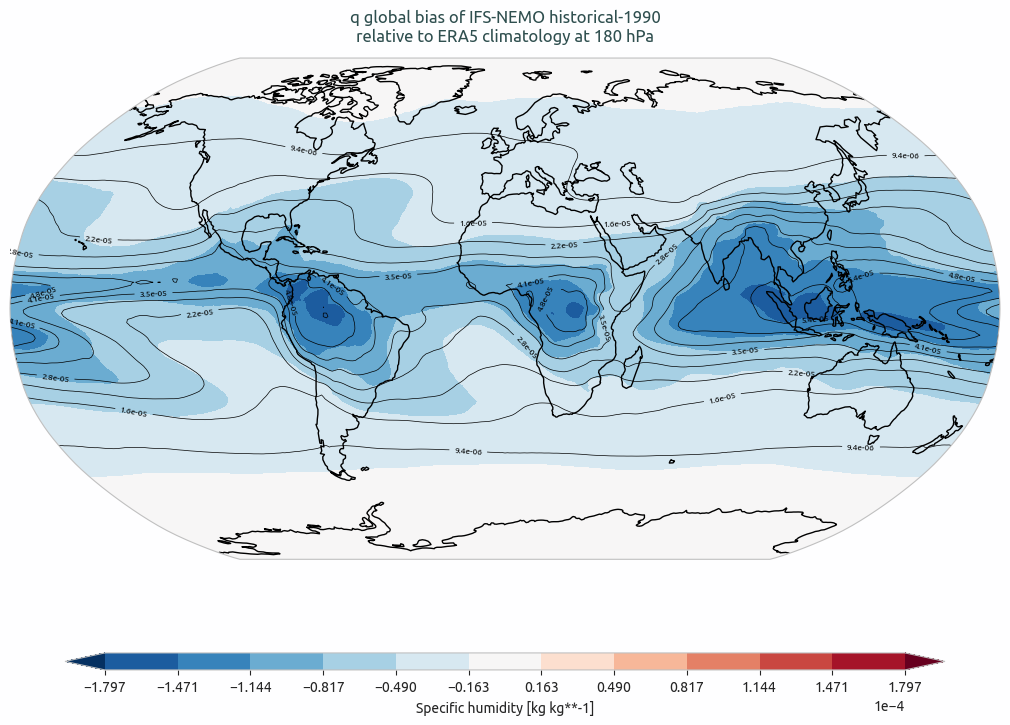

In [7]:
plot_biases.plot_bias(data=biases_ifs_nemo.climatology, data_ref=biases_era5.climatology, var=var, plev=18000)

We can also do a seasonal analysis:

2025-06-04 17:23:01 :: Global Biases :: INFO     -> Plotting seasonal biases.
2025-06-04 17:23:01 :: Pressure levels :: INFO     -> Selecting pressure level 18000 for variable 'q'.
2025-06-04 17:23:01 :: Pressure levels :: INFO     -> Selecting pressure level 18000 for variable 'q'.
2025-06-04 17:23:01 :: ConfigPath :: DEBUG    -> AQUA installation found in /users/caprioli/.aqua
2025-06-04 17:23:01 :: ConfigPath :: DEBUG    -> Configuration file found in /users/caprioli/.aqua/config-aqua.yaml
2025-06-04 17:23:01 :: ConfigPath :: DEBUG    -> Catalog found in /users/caprioli/.aqua/config-aqua.yaml file are ['ci', 'obs', 'climatedt-phase1', 'climatedt-e25.1']
2025-06-04 17:23:01 :: ConfigPath :: DEBUG    -> Available catalogs are ['ci', 'obs', 'climatedt-phase1', 'climatedt-e25.1']
2025-06-04 17:23:01 :: ConfigPath :: DEBUG    -> Default catalog will be ci
2025-06-04 17:23:01 :: ConfigPath :: DEBUG    -> Catalog file is /users/caprioli/.aqua/catalogs/ci/catalog.yaml
2025-06-04 17:23:01 ::

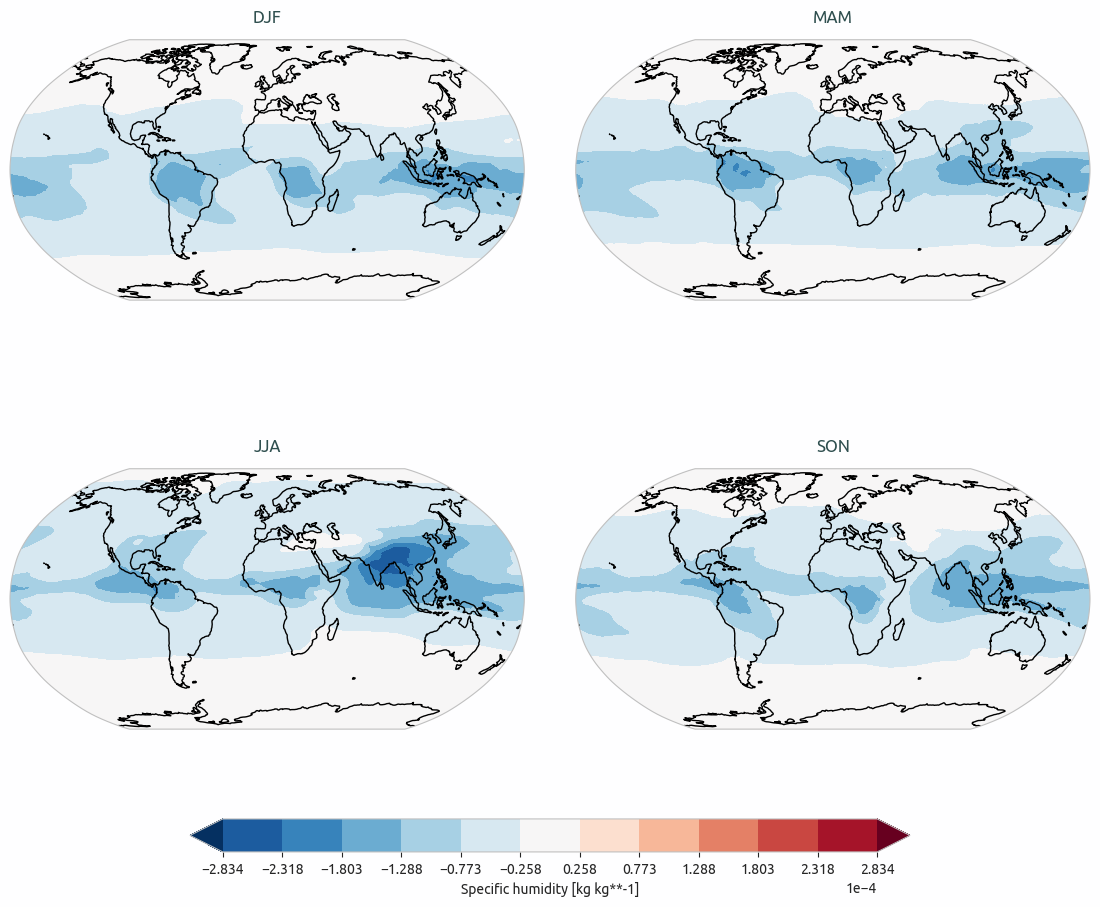

In [8]:
plot_biases.plot_seasonal_bias(data=biases_ifs_nemo.seasonal_climatology, data_ref=biases_era5.seasonal_climatology, var=var, plev=18000)

Finally, we can plot the vertical bias profile as a function of pressure levels:

2025-06-04 17:27:02 :: Global Biases :: INFO     -> Plotting vertical biases for variable: q
2025-06-04 17:27:29 :: Global Biases :: INFO     -> Vertical bias plot completed successfully.


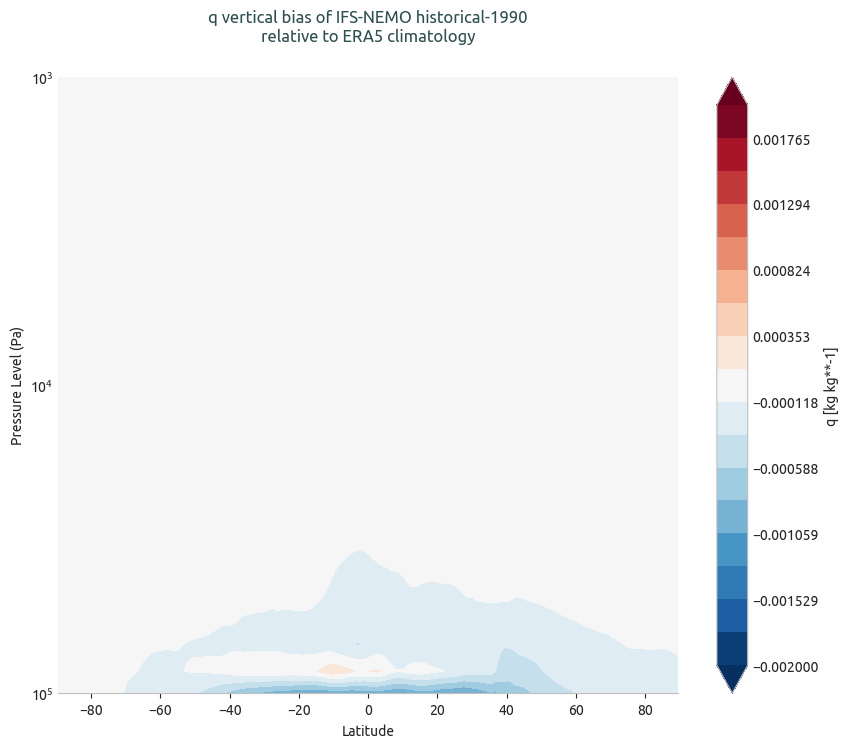

In [10]:
plot_biases.plot_vertical_bias(data=biases_ifs_nemo.climatology, data_ref=biases_era5.climatology, var=var,
                                vmin= -0.002, vmax= 0.002)